<a href="https://colab.research.google.com/github/victorviro/Machine-Learning-Python/blob/master/Statistical_hypothesis_tests_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


1. [Introduction](#1)
    1. [Hypothesis testing](#1.1)
        1. [Example: Independent two-sample t-test](#1.1.1)
        2. [Statistical test interpretation](#1.1.2)
            1. [Critical values](#1.1.2.1)
            1. [P-values](#1.1.2.2)
    2. [Confidence intervals](#1.2)
2. [Summary statistical tests](#2)
    1. [Inferences about the means](#2.1)
        1. [Analysis of variance](#2.1.1)
            1. [Post-hoc analysis](#2.1.1.1)
    2. [Inferences about the variances](#2.2)
        1. [Inferences about the variances of normal distributions ](#2.2.1)
        2. [Statistical tests for equality of variance](#2.2.2)
    3. [Normality tests](#2.3)
    4. [Nonparametric tests](#2.4)
    5. [Correlation tests](#2.5)
3. [References](#3)




# 1 Introduction <a name="1"></a>

In statistics, when we wish to start asking **questions about the data** and interpret the results, we use statistical methods that provide a confidence or likelihood about the answers. In general, this class of methods is called [**statistical hypothesis testing**](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing), or significance tests.

In this notebook, we explain the key concepts of statistical hypothesis testing. Then, we summary the most used statistical tests in machine learning. 

## 1.1 Hypothesis testing <a name="1.1"></a>

A statistical hypothesis is a **statement** or assumption either about the parameters of a probability distribution or the parameters of a model. The hypothesis reflects some conjecture about the problem situation. The result of the test allows us to **interpret whether the assumption holds or whether the assumption has been violated**.

Some concrete examples might be:

- A test that assumes that data follows a normal distribution.
- A test that assumes that 2 independent samples have identical average.


Let's think about the last example. This may be stated formally as 

$$
H_0: \mu_1=\mu_2\\
H_1: \mu_1\neq\mu_2
$$

where $\mu_1$ is the mean of the first sample and $\mu_2$ is the mean of the second sample. The statement $H_0: \mu_1=\mu_2$ is called the **null hypothesis** and $H_1: \mu_1\neq\mu_2$ is called the **alternative hypothesis**. The alternative hypothesis specified here is called a two-sided alternative hypothesis because it would be true if $\mu_1<\mu_2$ or if $\mu_1>\mu_2$.

Two kinds of errors may be committed when testing hypotheses. If the null hypothesis is rejected when it is true, a type I error has occurred. If the null hypothesis is not rejected when it is false, a type II error has been made. The probabilities of these two errors are given
special symbols

$$
\alpha=P(type I error)\\
\beta=P(type II error)
$$

The general procedure in hypothesis testing is to specify a value of the probability of type I error $\alpha$, often called the **significance level** of the test, and then design the test procedure so that the probability of type II error $\beta$ has a suitably small value.




### 1.1.1 Example: Independent two-Sample t-Test <a name="1.1.1"></a>

Suppose that we could assume that the variances were identical for both samples. Then the appropriate test statistic to use for comparing two sample means is

$t_o=\frac{\overline{y_1}-\overline{y_2}}{S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}\sim t_{n_1+n_2-2}$

where $\overline{y_1}$ and $\overline{y_2}$ are the sample means, $n_1$ and $n_2$ are the sample sizes, $S^2_p$ is an estimate of the common variance $\sigma^2_1=\sigma^2_2=\sigma^2$, 
and $t_{n_1+n_2-2}$ is the $t$ distribution with $n_1+n_2-2$ degrees of freedom.




### 1.1.2 Statistical Test Interpretation <a name="1.1.2"></a>

There are two common forms to interpret a statistical hypothesis test, and they must be interpreted in different ways. They are the critical values and p-value.

#### 1.1.2.1 Critical values <a name="1.1.2.1"></a>

A statistic calculated by a statistical hypothesis test can be interpreted using critical values from the distribution of the test statistic.

A [**critical value**](https://en.wikipedia.org/wiki/Critical_value) is defined in the context of the population distribution and a probability.

$$P(X\leq \text{critical value})=p$$

Where $X$ are observations from the population, $\text{critical value}$ is the calculated critical value, and $p$ is the chosen probability.

Critical values are calculated using a mathematical function where the probability is provided as an argument. For most common distributions, the value cannot be calculated analytically; instead, it must be estimated using numerical methods. Historically it is common for tables of pre-calculated critical values to be provided in the appendices of statistics textbooks for reference purposes.

When critical values are used in statistical significance testing, the probability is often expressed as a significance, denoted as $\alpha$, which is the inverted probability.

$$p=1-\alpha$$

Calculated critical values are used as a threshold for interpreting the result of a statistical test.

The observation values in the population beyond the critical value are often called the **critical region** or the *“region of rejection"*.

**One-Tailed Test**

A one-tailed test has a single critical value, such as on the left or the right of the distribution. Often, a one-tailed test has a critical value on the right of the distribution for non-symmetrical distributions (such as the Chi-Squared distribution).

The statistic is compared to the calculated critical value. If the statistic is less than or equal to the critical value, we fail to reject the null hypothesis. Otherwise, it is rejected.

We can summarize this interpretation as follows:

- $\text{Test Statistic}\leq \text{Critical Value}$: Fail to reject the null hypothesis of the statistical test.
- $\text{Test Statistic}> \text{Critical Value}$: Reject the null hypothesis of the statistical test.

**Two-Tailed Test**

A two-tailed test has two critical values, one on each side of the distribution, which is often assumed to be symmetrical (e.g. Gaussian and Student-t distributions).

When using a two-tailed test, a significance level (or alpha) used in the calculation of the critical values must be divided by 2. The critical value will then use a portion of this alpha on each side of the distribution.
To make this concrete, consider an alpha of 5%. This would be split to give two alpha values of 2.5% on either side of the distribution with an acceptance area in the middle of the distribution of 95%.

We can refer to each critical value as the lower and upper critical values for the left and right of the distribution respectively. Test statistic values more than or equal to the lower critical value and less than or equal to the upper critical value indicate the failure to reject the null hypothesis. Whereas test statistic values less than the lower critical value and more than the upper critical value indicates rejection of the null hypothesis for the test.

We can summarize this interpretation as follows:

- $\text{Lower CR} \leq \text{Test Statistic} \leq \text{Upper CR}$: Failure to reject the null hypothesis of the statistical test.

- $\text{Test Statistic} < \text{Lower CR} \text{ OR } \text{Test Statistic} > \text{Upper CR}$: Reject the null hypothesis of the statistical test.

If the distribution of the test statistic is symmetric around a mean of zero, then we can shortcut the check by comparing the absolute value of the test statistic to the upper critical value.

- $|\text{Test Statistic}| \leq \text{Upper Critical Value}$: Failure to reject the null hypothesis of the statistical test.

Where $|\text{Test Statistic}|$ is the absolute value of the calculated test statistic.


In our two sample $t$-test example, to determine whether to reject $H_0$, we would compare the value of the test statistic, $t_0$, to the upper critical value. If $|t_0|> t_{\frac{\alpha}{2},n_1+n_2-2}$, where $t_{\frac{\alpha}{2},n_1+n_2-2}$ is the upper $\frac{\alpha}{2}$ percentage point of the $t$ distribution with $n_1+n_2-2$ degrees of freedom, we would reject $H_0$ and conclude that the mean of the two samples differ. 

#### 1.1.2.2 P-values <a name="1.1.2.2"></a>

The [**P-value**](https://en.wikipedia.org/wiki/P-value) is the **probability that the test statistic will take on a value that is possible** (or that is at least as extreme as the observed value of the statistic) **when the null hypothesis $H_0$ is true**. In simple terms, this value helps us to differentiate results caused by the randomness of statistically significant results. More formally, we define the P-value as the smallest level of significance that would lead to rejection of the null hypothesis $H_0$. It is not always easy to compute the exact P-value for a test. However, most modern computer programs for statistical analysis report P-values.

If $\text{p-value}<\alpha$ then the null hypothesis $H_0$ would be rejected at level of significance $\alpha$.

## 1.2 Confidence Intervals <a name="1.2"></a>

Although hypothesis testing is a useful procedure, it sometimes does not tell the entire story. It is often preferable to provide an interval within which the value of the parameter or parameters in question would be expected to lie. These interval statements are called **confidence intervals**. 

To define a confidence interval, suppose that $\theta$ is an unknown parameter. To obtain an interval estimate of $\theta$, we need to find two statistics $L$ and $U$ such that the probability statement 

$$P(L\leq \theta\leq U)=1-\alpha$$

is true. The interval 

$$L\leq \theta\leq U$$
 
is called a $100(1-\alpha$) **percent confidence interval** for the parameter $\theta$. The interpretation of this interval is that if, in repeated random samplings, a large number of such intervals are constructed, $100(1-\alpha)$ percent of them will contain the true value of $\theta$ . The statistics $L$ and $U$ are called the lower and upper confidence limits, respectively, and $1-\alpha$ is called the confidence coefficient. 

Suppose that we wish to find a $100(1-\alpha$) percent confidence interval on the true difference in means $\mu_1-\mu_2$ for the previous example. The interval can be derived in the following way. The test statistic is

$$\frac{\overline{y_1}-\overline{y_2}-(\mu_1-\mu_2)}{S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}\sim t_{n_1+n_2-2}$$

Then we could prove that the $100(1-\alpha$) percent confidence interval for $\mu_1-\mu_2$ is

$$\overline{y_1}-\overline{y_2}-t_{n_1+n_2-2}S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}\leq \mu_1-\mu_2 \leq \overline{y_1}-\overline{y_2}+t_{n_1+n_2-2}S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}$$

The actual 95 percent confidence interval estimate for the difference in mean for the two samples of the previous example is found by substituting in the equation.


# 2 Summary statistical tests <a name="2"></a>

Although there are hundreds of statistical hypothesis tests that we could use, there is only a small subset that we may need to use in machine learning. 

- Some tests can be used in the exploratory data analysis phase to better understand the relationship between variables.

- Once a machine learning model is deployed in production, a practical approach to monitor its performance degradation is *drift detection*. It suggests that if the data distribution diverges between the training and testing phases on one side and the development phase on the other, it is a strong signal that the model’s performance won’t be the same. It's common the usage of statistical tests to check if the distribution of the features does not vary between these two phases.

In this section, we will discover the most popular statistical hypothesis tests used in machine learning with examples using Python.

In [1]:
import numpy as np

## 2.1 Inferences about the means <a name="2.1"></a>

Before we look at specific significance tests, let’s first define a test dataset that we can use to demonstrate each test.

We will generate two samples drawn from different distributions. Each sample will be drawn from a Gaussian distribution. We will use the `randn()` NumPy function to generate a sample of 100 Gaussian random numbers in each sample with a mean of 0 and a standard deviation of 1. Observations in the first sample are scaled to have a mean of 50 and a standard deviation of 5. Observations in the second sample are scaled to have a mean of 51 and a standard deviation of 5.

We expect the statistical tests to discover that the mean of two samples are not equal, although the small sample size of 100 observations per sample will add some noise to this decision.



In [ ]:
# seed the random number generator
np.random.seed(1)
# generate two sets of univariate observations
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 51

# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))

data1: mean=50.303 stdv=4.426
data2: mean=51.764 stdv=4.660


In [ ]:
data1

We have showed the [**independent two-sample t-test**](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test) to check that the mean of two independent samples are equal. We assumed that the variances were identical for both samples. The null hypothesis of the test is that the means of two populations are equal. A rejection of this hypothesis indicates that there is sufficient evidence that the means of the populations are different (and in turn that the distributions are not equal). We can use the [`ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) Scipy function to implement this test:

In [ ]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The means of the populations are equal (fail to reject H0)')
else:
	print('The means of the populations are different (reject H0)')

Statistics=-2.262, p=0.025
The means of the populations are different (reject H0)


If the variances are not identical for both samples we must use a slightly modified test statistic ([Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test)). To apply this test we can use previous `ttest_ind()` function setting the parameter `equal_var=False`. 

The two samples can be dependent. For example, the data samples may represent two independent measures or evaluations of the same object. These data samples are repeated or dependent and are referred to as paired samples or repeated measures. Because the samples are not independent, we cannot use the previous test. Instead, we must use a modified version of the test that corrects for the fact that the data samples are dependent, called the paired Student’s t-test or [dependent t-test for paired samples](https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples). This stet can be implemented in python using the [`ttest_rel()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) Scipy function.


If the variances for both samples are known (and both populations are normal, or if the sample sizes are large enough so that the central limit theorem applies) then the hypothesis may be tested using a direct application of the normal distribution (the **two-sample Z-test**). 

Some experiments involve comparing only one population mean $\mu$ to a specified value, say, $\mu_0$ . The null hypothesis is $H_0: \mu=\mu_0$. If the population is normal with known variance, or if the population is nonnormal but the sample size is large enough so that the central limit theorem applies, then the hypothesis may be tested using a direct application of the normal distribution (the one-sample [Z-test](https://en.wikipedia.org/wiki/Z-test)). If the variance of the population is unknown, we must make the additional assumption that the population is normally distributed, although moderate departures from normality will not seriously affect the results. To test $H_0: \mu=\mu_0$ in the variance unknown case, the sample variance $S^2$ is used to estimate $\sigma^2$ and we used the [one-sample t-test](https://en.wikipedia.org/wiki/Student%27s_t-test#One-sample_t-test). We can use the [`ttest_1samp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) Scipy function.

Tables 2.4 and 2.5 summarize the t-test and z-test procedures discussed above for sample means. Critical regions are shown for both two-sided and one-sided alternative hypotheses.

![alt text](https://i.ibb.co/HXwd8dN/means1.png)

![alt text](https://i.ibb.co/yfkL2zY/means2.png)

### 2.1.1 Analysis of variance (ANOVA) <a name="2.1.1"></a>

There are sometimes situations where we may have multiple independent data samples. We can perform the Student’s t-test pairwise on each combination of the data samples to get an idea of which samples have different means. This can be onerous if we are only interested in whether all samples have the same distribution or not.

The [Analysis of variance](https://en.wikipedia.org/wiki/Analysis_of_variance) (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among group means in a sample.

ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means. It cannot quantify which samples differ or by how much. 

The test requires that the data samples are a Gaussian distribution, that the samples are independent, and that all data samples have the same standard deviation.

The ANOVA one-factor test can be performed in Python using the [`f_oneway()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) SciPy function.

#### 2.1.1.1 Post-hoc analysis <a name="2.1.1.1"></a>

When the ANOVA indicates that row or column means differ, it is usually of interest to make comparisons between the individual row or column means to discover the specific differences.

The [Scheffé’s Method](https://en.wikipedia.org/wiki/Scheff%C3%A9%27s_method) is used to compare any possible contrast between treatment means.

**Comparing pairs of treatment means**: In many practical situations, we will wish to compare only pairs of means. Frequently, we can determine which means differ by testing the differences between all pairs of treatment means.

- The [Tukey’s Test](https://en.wikipedia.org/wiki/Tukey%27s_range_test) is a single-step multiple comparison procedure and statistical test that can be used to find means that are significantly different from each other.


- The **Fisher Least Significant Difference (LSD)** method is also used to compare all pairs of means.

## 2.2 Inferences about the variances <a name="2.2"></a>

### 2.2.1 Inferences About the Variances of Normal Distributions <a name="2.2.1"></a>

In many experiments, we are interested in possible differences in the mean response for two samples. However, in some experiments, it is the comparison of variability in the data that is important.

Suppose we wish to test the hypothesis that the variance of a normal population equals a constant, for example, $\sigma_0^2$. Formally, we wish to test
$$H_o:\sigma^2=\sigma_0^2$$
$$H_o:\sigma^2\neq \sigma_0^2$$

We can use the [Chi-squared test for variance in a normal population](https://en.wikipedia.org/wiki/Chi-squared_test#Chi-squared_test_for_variance_in_a_normal_population). The test statistic is 
$$\chi_o^2=\frac{SS}{\sigma_0^2}=\frac{(n-1)S^2}{\sigma_0^2}$$

where $SS=\sum{}{}\sum{}{}(y_{i}-\overline{y})^2$ is  the  corrected  sum  of  squares  of  the  sample  observations.  The appropriate reference distribution for $\chi_o^2$ is the chi-square distribution with $n-1$ degrees of freedom. The null hypothesis is rejected if $\chi_o^2>\chi_{\frac{\alpha}{2},n-1}^2$.

Now consider testing the equality of the variances of two normal populations. If independent random samples of size $n1$ and $n2$ are taken from populations 1 and 2, respectively,the test statistic for
$$H_o:\sigma_1^2=\sigma_2^2$$
$$H_o:\sigma_1^2\neq \sigma_2^2$$
is the ratio of the sample variances $F_0=\frac{S_1^2}{S_2^2}$

The appropriate reference distribution for $F_0$ is the $F$ distribution with $n_1-1$ numerator degrees of freedom and $n_2-1$ denominator degrees of freedom. The null hypothesis would be  rejected  if  
$$F_0>F_{\frac{\alpha}{2},n_1-1,n_2-1}$$ 

**Note**: This test is called [F-test of equality of variances](https://en.wikipedia.org/wiki/F-test_of_equality_of_variances). The [F-test](https://en.wikipedia.org/wiki/F-test) is used in a variety of tests including regression analysis, the Chow test, and the Scheffe Test (a post-hoc ANOVA test). 


![alt text](https://i.ibb.co/Z1jKJpZ/gggggg.png)

### 2.2.2 Statistical tests for equality of variance <a name="2.2.2"></a>

Equal variances across populations is called homoscedasticity or homogeneity of variances. Some statistical tests, for example the analysis of variance, assume that variances are equal across groups or samples. The following tests can be used to verify that assumption.

[Bartlett’s test](https://en.wikipedia.org/wiki/Bartlett%27s_test) is used to test if $k$ samples are from populations with equal variances. The null hypothesis is that all input samples are from populations with equal variances.



In [ ]:
# Create three samples
a = [8.88, 9.12, 9.04, 8.98, 9.00, 9.08, 9.01, 8.85, 9.06, 8.99]
b = [8.88, 8.95, 9.29, 9.44, 9.15, 9.58, 8.36, 9.18, 8.67, 9.05]
c = [8.95, 9.12, 8.95, 8.85, 9.03, 8.84, 9.07, 8.98, 8.86, 8.98]
print([np.var(x, ddof=1) for x in [a, b, c]])

[0.007054444444444413, 0.13073888888888888, 0.008890000000000002]


Given that the sample variance of `b` is much larger than that of `a` and `c`.

In [ ]:
from scipy.stats import bartlett

stat, p = bartlett(a, b, c)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('All input samples are from populations with equal variances (fail to reject H0)')
else:
	print('Not all input samples are from populations with equal variances (reject H0)')

stat=22.789, p=0.000
Not all input samples are from populations with equal variances (reject H0)


[Levene's test](https://en.wikipedia.org/wiki/Levene%27s_test) is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups.

In [ ]:
from scipy.stats import levene

stat, p = levene(a, b, c)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('All input samples are from populations with equal variances (fail to reject H0)')
else:
	print('Not all input samples are from populations with equal variances (reject H0)')

stat=7.585, p=0.002
Not all input samples are from populations with equal variances (reject H0)


## 2.3 Normality Tests <a name="2.3"></a>

In some statistical models like analysis of the variance and regression models, we need to check the normality assumption of the residuals. We can check this assumption by plotting a *histogram* of the residuals. If the assumption on the errors is satisfied, this plot should look like a sample from a normal distribution centered at zero. Unfortunately, with small samples, considerable fluctuation in the shape of a histogram often occurs, so the appearance of a moderate departure from normality does not necessarily imply a serious violation of the assumptions. Gross deviations from normality are potentially serious and require further analysis. Another extremely useful procedure is to construct a *normal probability plot* of the residuals.

There are many statistical tests that we can use to quantify whether a sample of data looks as though it was drawn from a Gaussian distribution. Each test makes different assumptions and considers different aspects of the data. We will look at 3 commonly used tests in this section that we can apply to our own data samples.

The [Shapiro–Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution. It tests the null hypothesis that a sample came from a normally distributed population. In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.



In [ ]:
from scipy.stats import shapiro

# seed the random number generator
np.random.seed(1)

# generate univariate observations
data = 5 * np.random.randn(100) + 50

stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


The [Anderson-Darling test](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test) is a statistical test of whether a given sample of data is drawn from a given probability distribution. When applied to testing whether a normal distribution adequately describes a set of data, it is one of the most powerful statistical tools for detecting most departures from normality. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test).



In [ ]:
from scipy.stats import anderson

result = anderson(data)
print('Statistic: %.3f' % result.statistic)

for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


We interpret the results by failing to reject the null hypothesis that the data is normal if the calculated test statistic is less than the critical value at a chosen significance level.

The [D’Agostino’s K^2 test](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test) calculates summary statistics from the data (kurtosis and skewness) to determine if the data distribution departs from the normal distribution.

In [ ]:
from scipy.stats import normaltest

stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


## 2.4 Nonparametric tests <a name="2.4"></a>

[Nonparametric statistics](https://en.wikipedia.org/wiki/Nonparametric_statistics) are those methods that do not assume a specific distribution to the data. A common question about two or more datasets is whether they are different. Specifically, whether the difference between their central tendency (e.g. mean or median) is statistically significant.

This question can be answered for data samples that do not have a Gaussian distribution by using nonparametric statistical significance tests. The null hypothesis of these tests is often the assumption that both samples were drawn from a population with the same distribution, and therefore the same population parameters, such as mean or median.

If after calculating the significance test on two or more samples the null hypothesis is rejected, it indicates that there is evidence to suggest that samples were drawn from different populations, and in turn, the difference between sample estimates of population parameters, such as means or medians may be significant.

The [Mann–Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution. The null hypothesis is that there is no difference between the distributions of the data samples. Rejection of this hypothesis suggests that there is likely some difference between the samples. More specifically, the test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution. If violated, it suggests differing distributions. For the test to be effective, it requires at least 20 observations in each data sample.

We will use the `randn()` NumPy function to generate a sample of 100 Gaussian random numbers in each sample with a mean of 0 and a standard deviation of 1. Observations in the first sample are scaled to have a mean of 50 and a standard deviation of 5. Observations in the second sample are scaled to have a mean of 51 and a standard deviation of 5.

We expect the statistical tests to discover that the samples were drawn from differing distributions, although the small sample size of 100 observations per sample will add some noise to this decision.



In [ ]:
from scipy.stats import mannwhitneyu

# seed the random number generator
np.random.seed(1)

# generate two independent samples
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 51

stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=4025.000, p=0.009
Different distribution (reject H0)


In some cases, the data samples may be paired (the samples are related or matched in some way or represent two measurements of the same technique). Each sample is independent, therefore the Mann-Whitney U test cannot be used.
The [Wilcoxon signed-rank test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) is a nonparametric statistical procedure for comparing two samples that are paired, or related. The null hypothesis is that the two samples have the same distribution. For the test to be effective, it requires at least 20 observations in each data sample. This test is a [paired difference test](https://en.wikipedia.org/wiki/Paired_difference_test).


The example below demonstrates the calculation of the Wilcoxon signed-rank test on the test problem. The two samples are technically not paired, but we can pretend they are for the sake of demonstrating the calculation of this significance test.

In [ ]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=1886.000, p=0.028
Different distribution (reject H0)


When working with significance tests, such as Mann-Whitney U and the Wilcoxon signed-rank tests, comparisons between data samples must be performed pair-wise. This can be inefficient if we have many data samples and we are only interested in whether two or more samples have a different distribution. The [Kruskal–Wallis Test](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance) is a nonparametric version of the one-way analysis of variance test (ANOVA). 
The null hypothesis is that all data samples were drawn from the same distribution. Specifically, that the population medians of all groups are equal. A rejection of the null hypothesis indicates that there is enough evidence to suggest that one or more samples dominate another sample, but the test does not indicate which samples or by how much. Each data sample must be independent, have 5 or more observations, and the data samples can differ in size.

We can update the test problem to have 3 data samples, instead of 2, two of which have the same sample mean. Given that one sample differs, we would expect the test to discover the difference and reject the null hypothesis.


In [ ]:
from scipy.stats import kruskal

np.random.seed(1)
# generate three independent samples
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 50
data3 = 5 * np.random.randn(100) + 52

stat, p = kruskal(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=6.051, p=0.049
Different distributions (reject H0)


We may have more than two different samples and interest in whether all samples have the same distribution or not. If the samples are paired in some way, such as repeated measures, then the Kruskal-Wallis H test would not be appropriate. The [Friedman test](https://en.wikipedia.org/wiki/Friedman_test) is the nonparametric version of the repeated measures analysis of variance test. The null hypothesis is that the multiple paired samples have the same distribution. A rejection of the null hypothesis indicates that one or more of the paired samples has a different distribution. The test assumes two or more paired data samples with 10 or more samples per group.

Although the samples are not paired, we expect the test to discover that not all of the samples have the same distribution.

In [ ]:
from scipy.stats import friedmanchisquare

stat, p = friedmanchisquare(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=9.360, p=0.009
Different distributions (reject H0)


The [Kolmogorov-Smirnov](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) test is a non-parametric hypothesis test that can be used to check whether two samples come from the same continuous distribution. It measures a distance between the empirical distribution functions.

In [ ]:
from scipy.stats import ks_2samp 

# seed the random number generator
np.random.seed(1)

# generate two independent samples
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 51

stat, p = ks_2samp(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=0.220, p=0.016
Different distributions (reject H0)


## 2.5 Correlation Tests <a name="2.5"></a>

It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation. A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

The performance of some algorithms can deteriorate if two or more variables are tightly related, called [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity). An example is a linear regression, where one of the offending correlated variables should be removed in order to improve the skill of the model.

We may also be interested in the correlation between input variables with the output variable in order to provide insight into which variables may or may not be relevant as input for developing a model.

This section lists statistical tests that we can use to check if two samples are related. 

Before we look at correlation methods, let’s define a dataset we can use to test the methods.

We will generate 1,000 samples of two variables with a strong positive correlation. The first variable will be random numbers drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 20. The second variable will be values from the first variable with Gaussian noise added with a mean of 50 and a standard deviation of 10. We will use the `randn()` function to generate random Gaussian values with a mean of 0 and a standard deviation of 1, then multiply the results by our own standard deviation and add the mean to shift the values into the preferred range.


data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


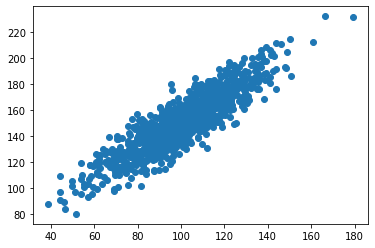

In [ ]:
from matplotlib import pyplot
# seed random number generator
np.random.seed(1)
# prepare data
data1 = 20 * np.random.randn(1000) + 100
data2 = data1 + (10 * np.random.randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

The covariance and covariance matrix are used widely within statistics and multivariate analysis to characterize the relationships between two or more variables.

In [ ]:
# calculate covariance matrix
covariance = np.cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


The covariance between the two variables is 389.75. We can see that it is positive, suggesting the variables change in the same direction as we expect. A problem with covariance as a statistical tool alone is that it is challenging to interpret. This leads us to the Pearson’s correlation coefficient next.

The [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) can be used to summarize the strength of the linear relationship between two data samples. It is computed as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score. The result of the calculation, the correlation coefficient can be interpreted to understand the relationship. The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and a value below those values suggests a less notable correlation.

In [ ]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


We can see that the two variables are positively correlated and that the correlation is `0.88`.

We can compute a matrix of the relationships between each pair of variables in the dataset. The result is a symmetric matrix called a correlation matrix with a value of 1.0 along the diagonal as each column always perfectly correlates with itself. The `corr()` method of Pandas DataFrames computes pairwise correlation of columns.

Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables. In this case, the [Spearman's rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables but will have slightly less power. As with the Pearson correlation coefficient, the scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively. Instead of calculating the coefficient using covariance and standard deviations on the samples themselves, these statistics are calculated from the relative rank of values on each sample. A linear relationship between the variables is not assumed, although a monotonic relationship (an increasing or decreasing relationship) is assumed.


In [ ]:
from scipy.stats import spearmanr

# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


The [Kendall rank correlation coefficient](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient) is often used as a test statistic in a statistical hypothesis test to establish whether two variables may be regarded as statistically dependent. The intuition for the test is that it calculates a normalized score for the number of matching or concordant rankings between the two samples. As a statistical hypothesis test, the null hypothesis is that there is no association between the two samples.



In [ ]:
from scipy.stats import kendalltau

coef, p = kendalltau(data1, data2)
print('Kendall correlation coefficient: %.3f, p:%.3f' % (coef,p))
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0)')
else:
	print('Samples are correlated (reject H0)')

Kendall correlation coefficient: 0.688, p:0.000
Samples are correlated (reject H0)


The [Pearson's chi-squared test](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test) is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable. The test calculates a statistic that has a chi-squared distribution and can be interpreted to reject or fail to reject the assumption that the observed and expected frequencies are the same. The variables are considered independent if the observed and expected frequencies are similar, that the levels of the variables do not interact, are not dependent.

The `chi2_contingency()` SciPy function takes an array as input representing the contingency table for the two categorical variables. It returns the calculated statistic and p-value for interpretation as well as the calculated degrees of freedom and table of expected frequencies. 

A contingency table is defined below that has a different number of observations for each population (row) but a similar proportion across each group (column). Given the similar proportions, we would expect the test to find that the groups are similar and that the variables are independent (fail to reject the null hypothesis, $H_0$). The calculated expected frequency table is printed and we can see that indeed the observed contingency table does appear to match via a check of the numbers.

In [ ]:
from scipy.stats import chi2_contingency

# contingency table
contingency_table = [[10, 20, 30],
		             [6,  9,  17]]

# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contingency_table)
print('Expected frequency table:\n', expected)
alpha=0.05
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Expected frequency table:
 [[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
Independent (fail to reject H0)


**Note**: We can compute the contingency table of two categorical variables in a dataset using the `crosstab()` Pandas function.

**Note**: Once a machine learning model is trained and deployed in production, there are two approaches to monitor its performance degradation: ground truth evaluation or input drift detection. The logic of input drift detection is that if the data distribution (e.g., mean, standard deviation, correlations between features, etc.) diverges between the training and testing phases on one side and the development phase on the other, it is a strong signal that the model’s performance won’t be the same. This method requires, for each feature, applying a statistical test on data from the source distribution and the target distribution.

- For continuous features, the nonparametric Kolmogorov-Smirnov test is mostly used.

- For categorical features, the Pearson's chi-squared test is a practical choice.

# References <a name="3"></a>

- Nonparametric Statistics for Non-Statisticians: A Step-by-Step

- Design and analysis of experiments

- [Statistical hypothesis tests in python](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)